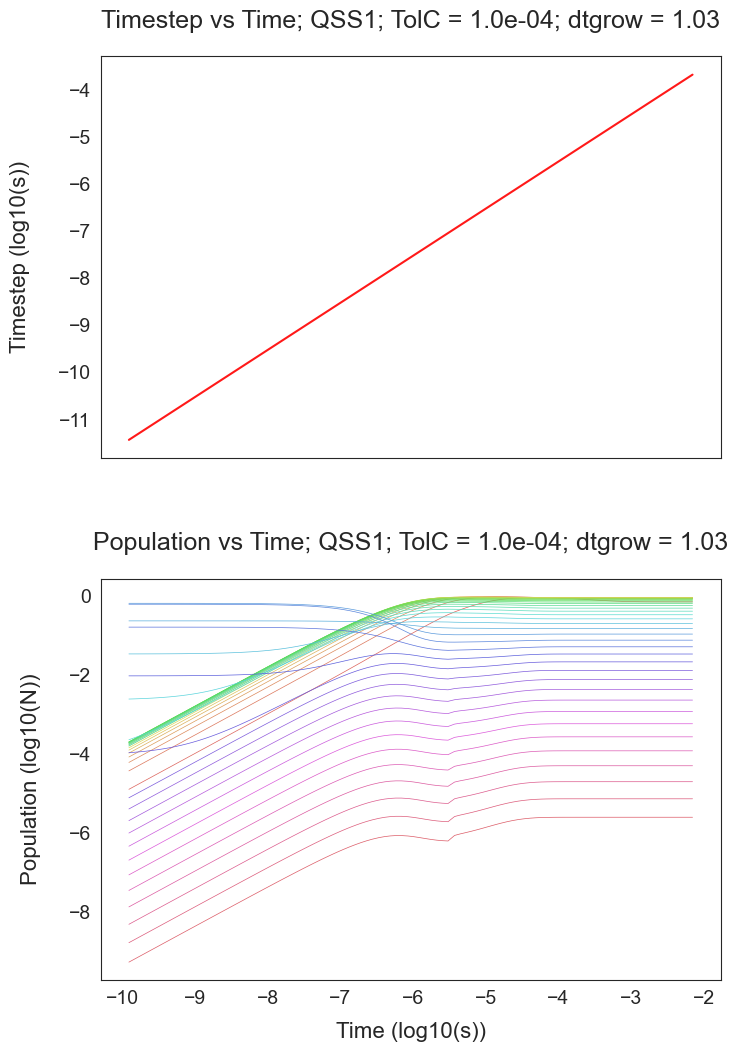

In [21]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Set the directory where the plotfiles are located
file_dir = "./Output"

# Initialize empty lists to store the t and dt values, N values
t_values = []
dt_values = []
N_values = []

# Loop over each plotfile
for i in range(99):
    # Construct the filename
    filename = os.path.join(file_dir, f"PlotFile_{i}")

    # Open the file and extract the dt, t, and N values
    with open(filename, "r") as f:
        N = []
        for line in f:
            if line.startswith("t:"):
                t = float(line.split(": ")[1])
            elif line.startswith("dt:"):
                dt = float(line.split(": ")[1])
            elif line.startswith("N:"):
                N_line = line.split(": ")[1].strip()
                N.append(np.array([float(x) for x in N_line.split()]))

    # Append the t, dt, and N values to the lists
    t_values.append(t)
    dt_values.append(dt)
    N_values.append(N)

# Convert the lists to NumPy arrays
t_array = np.array(t_values)
dt_array = np.array(dt_values)
N_array = np.array(N_values)

# Apply log10 to the relevant arrays
t_log_array = np.log10(t_array)
dt_log_array = np.log10(dt_array)
N_log_array = np.log10(N_array)

# Set up the subplots sharing the same x-axis
sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 12), sharex=True)

# Plot dt vs t on the first subplot
ax1.plot(t_log_array[1:], dt_log_array[1:], c="red", alpha=0.9, linewidth=1.5, zorder=2)
ax1.set_ylabel("Timestep (log10(s))", fontsize=16, labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Plot N vs t on the second subplot
palette = sns.color_palette("hls", n_colors=N_log_array.shape[2])
colors = list(palette.as_hex())
for i in range(N_log_array.shape[2]):
    ax2.plot(t_log_array[1:], N_log_array[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)
    

ax2.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax2.set_ylabel("Population (log10(N))", fontsize=16, labelpad=20)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Add titles
ax1.set_title("Timestep vs Time; QSS1; TolC = 1.0e-04; dtgrow = 1.03", fontsize=18, y=1.05)
ax2.set_title("Population vs Time; QSS1; TolC = 1.0e-04; dtgrow = 1.03", fontsize=18, y=1.05)

# Adjust the space between the subplots
fig.subplots_adjust(hspace=0.3)

# Save the plot to a file
#plt.savefig("combined_plot_separate_subplots_Model_5.pdf", dpi=300, bbox_inches="tight")

plt.show()


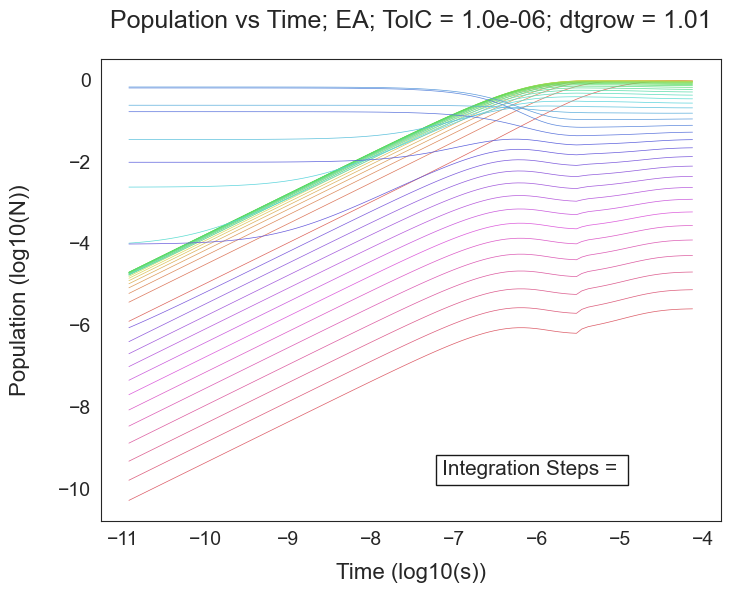

In [8]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the directory where the plotfiles are located
file_dir = "./Output"

# Initialize empty lists to store the t and N values
t_values = []
N_values = []

# Loop over each plotfile
for i in range(99):
    # Construct the filename
    filename = os.path.join(file_dir, f"PlotFile_{i}")

    # Open the file and extract the t and N values
    with open(filename, "r") as f:
        N = []
        for line in f:
            if line.startswith("t:"):
                t = float(line.split(": ")[1])
            elif line.startswith("N:"):
                N_line = line.split(": ")[1].strip()
                N.append(np.array([float(x) for x in N_line.split()]))

    # Append the t and N values to the lists
    t_values.append(t)
    N_values.append(N)

# Convert the lists to NumPy arrays
t_array = np.array(t_values)
N_array = np.array(N_values)

# Apply log10 to the relevant arrays
t_log_array = np.log10(t_array)
N_log_array = np.log10(N_array)

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))
palette = sns.color_palette("hls", n_colors=N_log_array.shape[2])
colors = list(palette.as_hex())
for i in range(N_log_array.shape[2]):
    ax.plot(t_log_array[1:], N_log_array[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)

# Add integration steps box
ax.text(0.55, 0.1, "Integration Steps = ", transform=ax.transAxes, fontsize=15,
        bbox=dict(facecolor='white', edgecolor='black', alpha=0.9))

ax.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax.set_ylabel("Population (log10(N))", fontsize=16, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=14)

# Add title
ax.set_title("Population vs Time; EA; TolC = 1.0e-06; dtgrow = 1.01", fontsize=18, y=1.05)

# Save the plot to a file
#plt.savefig("Pop_vs_time_Model_5_Slow.eps", dpi=300, bbox_inches="tight")

plt.show()


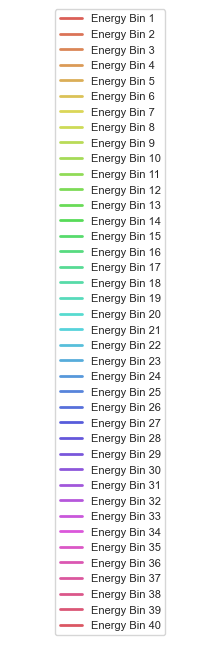

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import os

# Create a custom legend with all the energy bins
file_dir = "./Output"
filename = os.path.join(file_dir, "PlotFile_0")

# Read the number of energy bins from the file
with open(filename, "r") as f:
    for line in f:
        if line.startswith("N:"):
            num_energy_bins = len(line.split(": ")[1].strip().split())
            break

colors = sns.hls_palette(num_energy_bins)
legend_elements = [Line2D([0], [0], color=colors[i], lw=2, label=f"Energy Bin {i+1}") for i in range(num_energy_bins)]

# Create a dummy figure to hold the legend
fig_legend = plt.figure(figsize=(2, 4))
ax_legend = fig_legend.add_axes([0, 0, 1, 1])

# Add the custom legend to the dummy figure
ax_legend.legend(handles=legend_elements, loc="center", fontsize=8)

# Hide the axes and ticks of the dummy figure
ax_legend.axis("off")

# Save the legend as a separate image
#fig_legend.savefig("energy_bins_legend.png", dpi=300, bbox_inches="tight")

# Show the legend
plt.show()
